##Setting up imports and functions to process dataframes and features


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


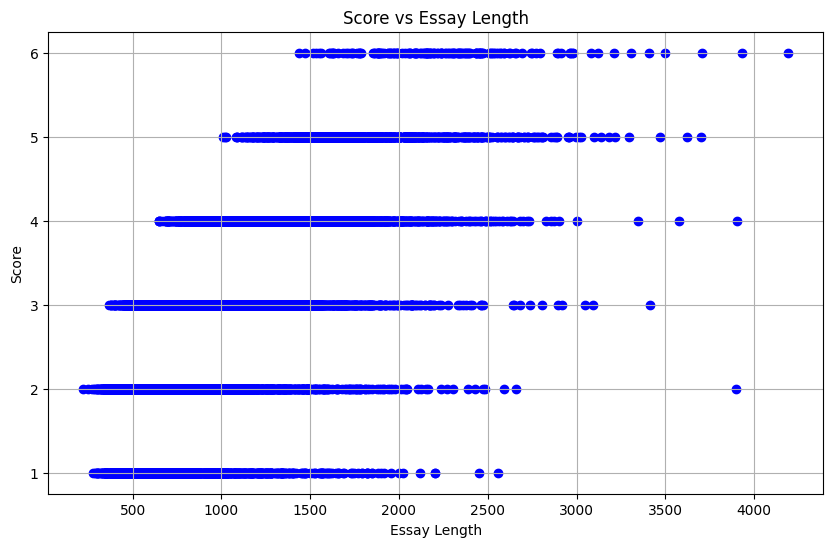

   score  essay_length
0      1         653.5
1      2         623.0
2      3         908.5
3      4        1270.0
4      5        1717.0
5      6        2195.5


,essay_id,full_text,score,processed_text,essay_length,essay_length_median
0,000d118,Many people have car where they live. The thin...,3,peopl car live thing dont know use car alot th...,2677,1877.5
1,000fe60,I am a scientist at NASA that is discussing th...,3,scientist nasa discus face mar explain face la...,1669,1877.5
2,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,dear state senat letter argu favor keep electo...,2208,1877.5
3,0033bf4,What is the Seagoing Cowboys progam?\n\nIt was...,3,seago cowboy progam help countri scar world wa...,1992,1877.5
4,0040e27,There are many reasons why you should join sea...,3,reason join seago cowboy program help countri ...,1521,1877.5
...,...,...,...,...,...,...
17302,f5e49e4,"January 23rd, 2015\n\nGreetings Mr. Senator,\n...",6,januari 23rd 2015 greet mr senat particular is...,3918,4410.5
17303,f6ccff9,"Within Nick D'Altos article ""Making Mona Lisa ...",6,nick dalto articl make mona lisa smile nick he...,4972,4410.5
17304,f72239d,Have you ever experienced a whirlwind of emoti...,6,experienc whirlwind emot dull class truli diff...,4476,4410.5
17305,f86b855,Emotions are a vital part of human life. Altho...,6,emot vital human life overlook present simpli ...,4427,4410.5


In [2]:
import pandas as pd
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import numpy as np
from nltk import FreqDist
from sklearn.metrics import roc_auc_score

# Ensure necessary NLTK downloads
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


# Ensure necessary NLTK downloads
nltk.download('punkt')
nltk.download('wordnet')

# Load and preprocess data
train_file = '/content/train.csv'
df = pd.read_csv(train_file)

# Example of adding word lengths to DataFrame
def calculate_word_lengths(text):
    words = word_tokenize(text)
    return [len(word) for word in words]

def comprehensive_text_preprocessing(text):
    # Lowercase and remove HTML tags
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    # Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

    return " ".join(words)  # Return the processed text

def average_word_length(text):
    words = text.split()  # Split the text into words
    if not words:
        return 0  # Avoid division by zero if there are no words
    total_length = sum(len(word) for word in words)
    return total_length / len(words)
# Applying the comprehensive_text_preprocessing to the 'full_text' column
df['processed_text'] = df['full_text'].apply(comprehensive_text_preprocessing)
df['essay_length'] = df['processed_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(df['essay_length'], df['score'], color='blue')
plt.title('Score vs Essay Length')
plt.xlabel('Essay Length')
plt.ylabel('Score')
plt.grid(True)
plt.show()
median_lengths_by_score = df.groupby('score')['essay_length'].median().reset_index()
print(median_lengths_by_score)

import pandas as pd

# Load your data
# df = pd.read_csv('your_data.csv')  # Uncomment and modify this line if starting from a CSV file

# Calculate the length of each essay
df['essay_length'] = df['full_text'].apply(len)

# Calculate the median essay length by score
median_lengths_by_score = df.groupby('score')['essay_length'].median().reset_index()

# Merge this median length back to the original dataframe to use as a feature
df = df.merge(median_lengths_by_score, on='score', suffixes=('', '_median'))

df


#The plot above shows that there is an evident relationship between the scores and the lengths of the essays. Therefore, we are choosing to median essay length as a feature and seeing what the results look like.

In [3]:
median_lengths_by_score

,score,essay_length
0,1,1300.5
1,2,1292.0
2,3,1877.5
3,4,2590.0
4,5,3455.0
5,6,4410.5


##outputting the media length of essays by score just to confirm our thoughts

##Linear Regression Model

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lin = lin_reg.predict(X_val)
mse_lin = mean_squared_error(y_val, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}')


Linear Regression MSE: 0.08392301698911413


##Random Forest Model and MSE w/ associated plots

Random Forest MSE: 0.0


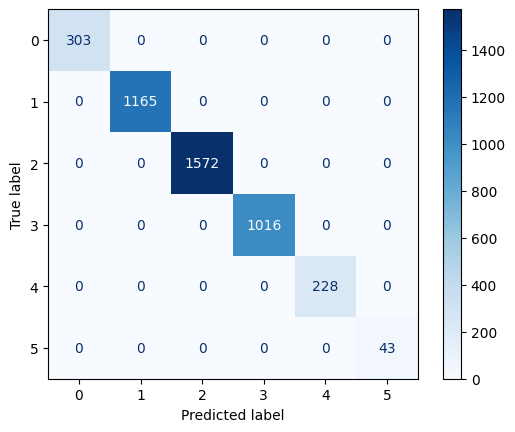

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       303
           2       1.00      1.00      1.00      1165
           3       1.00      1.00      1.00      1572
           4       1.00      1.00      1.00      1016
           5       1.00      1.00      1.00       228
           6       1.00      1.00      1.00        43

    accuracy                           1.00      4327
   macro avg       1.00      1.00      1.00      4327
weighted avg       1.00      1.00      1.00      4327

ROC AUC Score: 1.000


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf_reg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_reg.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')

cm = confusion_matrix(y_val, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

y_pred_prob = rf_reg.predict_proba(X_val)
print(classification_report(y_val, y_pred_rf))

roc_auc = roc_auc_score(y_val, y_pred_prob,multi_class = 'ovo')
print(f"ROC AUC Score: {roc_auc:.3f}")


The results for random forest are very strong but might be a sign of overfitting. The ROC AUC should be as close to 1 as possible and since its 1 here, the results show a strong model but more can be done to tune the model

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation (e.g., 5-fold cross-validation)
scores = cross_val_score(rf, X, y, cv=25, scoring='neg_mean_squared_error')

# The scoring function returns negative values for MSE to maximize the score
# Convert them to positive MSE values
mse_scores = -scores

# Calculate average MSE across all folds
average_mse = np.mean(mse_scores)
print("Average MSE:", average_mse)
print("MSE Scores for each fold:", mse_scores)

# Calculate the standard deviation to see the variability between folds
std_deviation = np.std(mse_scores)
print("Standard Deviation of MSE across folds:", std_deviation)





Average MSE: 0.009017341040462428
MSE Scores for each fold: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.22543353]
Standard Deviation of MSE across folds: 0.04417576877158102


##SVC Model and associated scores and plots

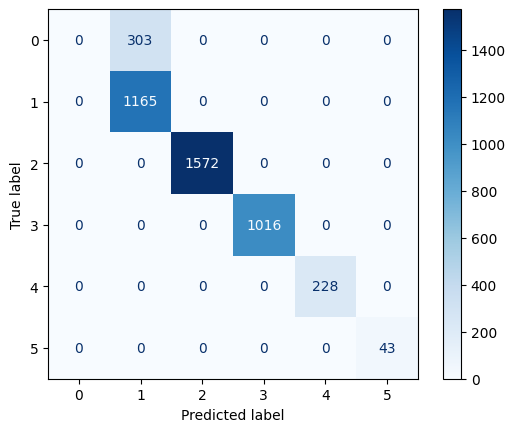

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       303
           2       0.79      1.00      0.88      1165
           3       1.00      1.00      1.00      1572
           4       1.00      1.00      1.00      1016
           5       1.00      1.00      1.00       228
           6       1.00      1.00      1.00        43

    accuracy                           0.93      4327
   macro avg       0.80      0.83      0.81      4327
weighted avg       0.87      0.93      0.90      4327

ROC AUC Score: 1.000


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Define features and target
X = df[['essay_length_median']]  # Features
y = df['score']  # Target

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle = True, random_state = 100000)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='auto',probability=True)
svm_classifier.fit(X_train, y_train)
SVM_prediction = svm_classifier.predict(X_val)
cm = confusion_matrix(y_val, SVM_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_val, SVM_prediction))
roc_auc = roc_auc_score(y_val, svm_classifier.predict_proba(X_val), multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.3f}")

The results for SVC are not as good but this means it might not be overfit and could end up being a better model when other tests are ran on it.